In [87]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling  #need to install using anaconda prompt (pip install pandas_profiling)
import sklearn 
import statsmodels
import statsmodels.formula.api as sm
import scipy.stats as stats
import os
import datetime as dt
import scipy.special as sp
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from patsy import dmatrices
from sklearn import metrics

In [116]:
# importing dataset
data = pd.read_csv('CC_GENERAL.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [6]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [7]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Derving new KPI's


In [117]:
#Monthly Avarage Purchages 
data['MONTHLY_AVG_PURCHASE'] = data['PURCHASES']/data['TENURE']

In [118]:
#Monthly Cash Advance 
data['MONTHLY_AVG_CASH_ADVANCE'] = data['CASH_ADVANCE']/data['TENURE']

In [119]:
#purchase type
#There aree 4 types of purchase behavior - deriving categorical variables based on the behavior
def purchasetype(data):
    if ((data.ONEOFF_PURCHASES == 0) & (data.INSTALLMENTS_PURCHASES == 0)):
        return 'NONE'
    if ((data.ONEOFF_PURCHASES > 0) & (data.INSTALLMENTS_PURCHASES == 0)):
        return 'ONE_OFF'
    if ((data.ONEOFF_PURCHASES > 0) & (data.INSTALLMENTS_PURCHASES > 0)):
        return 'ONEOFF_INSTALLMENT'
    if ((data.ONEOFF_PURCHASES == 0) & (data.INSTALLMENTS_PURCHASES > 0)):
        return 'INSTALLMENTS'

In [120]:
data['PURCHASE_TYPE']=data.apply(purchasetype,axis=1 )

In [121]:
#LIMIT USAGE ( Lower score implies customers are maintaining their balance properly)
data['LIMIT_USAGE'] = data['BALANCE']/data['CREDIT_LIMIT']

In [122]:
#PAYMENT_MINPAYMENT
data['PAYMENT_MINPAYMENT'] = np.where(data['MINIMUM_PAYMENTS']== 0, data['PAYMENTS'], 
                                        data['PAYMENTS']/data['MINIMUM_PAYMENTS'])

In [123]:
data=data.round(2)
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_AVG_CASH_ADVANCE,PURCHASE_TYPE,LIMIT_USAGE,PAYMENT_MINPAYMENT
0,C10001,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,...,1000.0,201.80,139.51,0.00,12,7.95,0.00,INSTALLMENTS,0.04,1.45
1,C10002,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,...,7000.0,4103.03,1072.34,0.22,12,0.00,536.91,NONE,0.46,3.83
2,C10003,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,...,7500.0,622.07,627.28,0.00,12,64.43,0.00,ONE_OFF,0.33,0.99
3,C10004,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,...,7500.0,0.00,NaN,0.00,12,124.92,17.15,ONE_OFF,0.22,NaN
4,C10005,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,...,1200.0,678.33,244.79,0.00,12,1.33,0.00,ONE_OFF,0.68,2.77


# Getting Insights from newly dervived KPI's

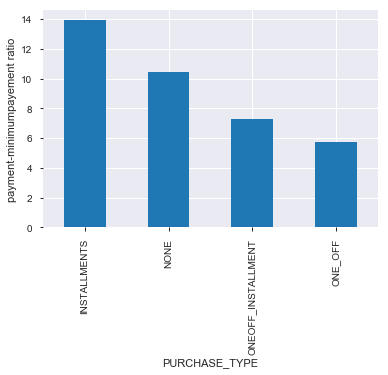

In [20]:
data.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['PAYMENT_MINPAYMENT'])).plot.bar()
plt.ylabel('payment-minimumpayement ratio')
plt.show()

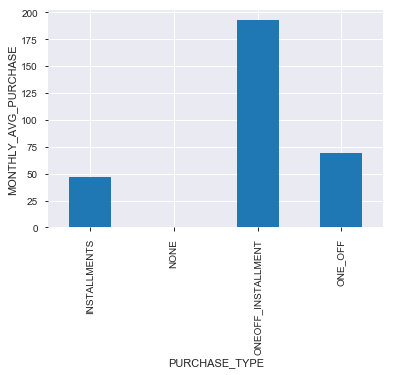

In [21]:
data.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['MONTHLY_AVG_PURCHASE'])).plot.bar()
plt.ylabel('MONTHLY_AVG_PURCHASE')
plt.show()

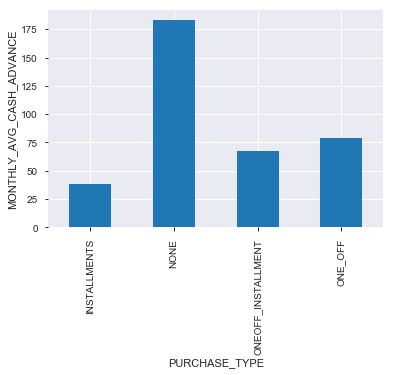

In [22]:
data.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['MONTHLY_AVG_CASH_ADVANCE'])).plot.bar()
plt.ylabel('MONTHLY_AVG_CASH_ADVANCE')
plt.show()

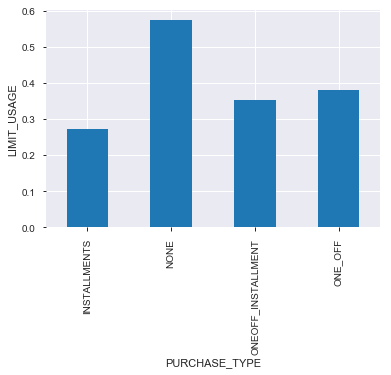

In [23]:
data.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['LIMIT_USAGE'])).plot.bar()
plt.ylabel('LIMIT_USAGE')
plt.show()

# Insights
- Customers with installments have highest payment-minimum payement ratio
- Customers with one off and installments do most monthly purchases
- Customers with no one off and installments take more monthly cash advance
- Customers with no one off and installments have highest limit usage

# Dropping CUST_ID and variables used in deriving KPI's

In [26]:
data = data.drop(['CUST_ID','BALANCE', 'PURCHASES' ,'PAYMENTS' ,'MINIMUM_PAYMENTS',  'TENURE', 'CASH_ADVANCE' ,
                                     'CREDIT_LIMIT'],axis=1)

In [29]:
data.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,MONTHLY_AVG_PURCHASE,MONTHLY_AVG_CASH_ADVANCE,PURCHASE_TYPE,LIMIT_USAGE,PAYMENT_MINPAYMENT
0,0.82,0.00,95.4,0.17,0.00,0.08,0.00,0,2,0.00,7.95,0.00,INSTALLMENTS,0.04,1.45
1,0.91,0.00,0.0,0.00,0.00,0.00,0.25,4,0,0.22,0.00,536.91,NONE,0.46,3.83
2,1.00,773.17,0.0,1.00,1.00,0.00,0.00,0,12,0.00,64.43,0.00,ONE_OFF,0.33,0.99
3,0.64,1499.00,0.0,0.08,0.08,0.00,0.08,1,1,0.00,124.92,17.15,ONE_OFF,0.22,NaN
4,1.00,16.00,0.0,0.08,0.08,0.00,0.00,0,1,0.00,1.33,0.00,ONE_OFF,0.68,2.77


In [28]:
pandas_profiling.ProfileReport(data)

In [30]:
data = data.drop(['ONEOFF_PURCHASES'],axis=1)
# ONEOFF_PURCHASES is highly correlated with MONTHLY_AVG_PURCHASE (ρ = 0.91306) 

In [32]:
dtype_df = data.dtypes.reset_index().rename(columns={0:'datatype','index':'col_name'})
dtype_df

,col_name,datatype
0,BALANCE_FREQUENCY,float64
1,INSTALLMENTS_PURCHASES,float64
2,PURCHASES_FREQUENCY,float64
3,ONEOFF_PURCHASES_FREQUENCY,float64
4,PURCHASES_INSTALLMENTS_FREQUENCY,float64
5,CASH_ADVANCE_FREQUENCY,float64
6,CASH_ADVANCE_TRX,int64
7,PURCHASES_TRX,int64
8,PRC_FULL_PAYMENT,float64
9,MONTHLY_AVG_PURCHASE,float64


In [33]:
# Seperating num and cat data(as we have to perform different operations while preparing them)
num_data = data.loc[:,list(dtype_df.col_name[(dtype_df.datatype == 'float64')|(dtype_df.datatype == 'int64')|(dtype_df.datatype == 'float32')|(dtype_df.datatype == 'int32')])]
num_data.info()
print('---------------')
cat_data = data.loc[:,list(dtype_df.col_name[(dtype_df.datatype == 'object')|(dtype_df.datatype == 'O')])]
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 13 columns):
BALANCE_FREQUENCY                   8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
PRC_FULL_PAYMENT                    8950 non-null float64
MONTHLY_AVG_PURCHASE                8950 non-null float64
MONTHLY_AVG_CASH_ADVANCE            8950 non-null float64
LIMIT_USAGE                         8949 non-null float64
PAYMENT_MINPAYMENT                  8637 non-null float64
dtypes: float64(11), int64(2)
memory usage: 909.1 KB
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949


In [35]:
def num_data_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.median(),x.mean(),x.std(),x.std()/x.mean(),x.var(),x.min(),x.quantile(0.01),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75),x.quantile(0.90),x.quantile(0.95),x.quantile(0.99),x.max()],
                       index= ['Non_null','Null','Sum','Median','Mean','Std_Dev','CV','Variance','Min','P1','P10','P25','P50','P75','P90','P95','P99','Max'])
num_data_sum =num_data.apply(num_data_summary)
num_data_sum.to_csv('num_data_sum.csv')
num_data_sum.T

,Non_null,Null,Sum,Median,Mean,Std_Dev,CV,Variance,Min,P1,P10,P25,P50,P75,P90,P95,P99,Max
BALANCE_FREQUENCY,8950.0,0.0,7852.96,1.000,0.877426,0.237169,0.270301,0.056249,0.0,0.09,0.45,0.8900,1.000,1.0000,1.000,1.0000,1.0000,1.00
INSTALLMENTS_PURCHASES,8950.0,0.0,3679055.42,89.000,411.067645,904.338115,2.199974,817827.426559,0.0,0.00,0.00,0.0000,89.000,468.6375,1140.070,1750.0875,3886.2405,22500.00
PURCHASES_FREQUENCY,8950.0,0.0,4387.44,0.500,0.490217,0.401678,0.819389,0.161345,0.0,0.00,0.00,0.0800,0.500,0.9200,1.000,1.0000,1.0000,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1809.48,0.080,0.202177,0.298555,1.476705,0.089135,0.0,0.00,0.00,0.0000,0.080,0.3000,0.750,1.0000,1.0000,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3262.75,0.170,0.364553,0.397623,1.090714,0.158104,0.0,0.00,0.00,0.0000,0.170,0.7500,1.000,1.0000,1.0000,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1207.45,0.000,0.134911,0.200262,1.484406,0.040105,0.0,0.00,0.00,0.0000,0.000,0.2200,0.420,0.5800,0.8300,1.50
CASH_ADVANCE_TRX,8950.0,0.0,29077.00,0.000,3.248827,6.824647,2.100650,46.575803,0.0,0.00,0.00,0.0000,0.000,4.0000,10.000,15.0000,29.0000,123.00
PURCHASES_TRX,8950.0,0.0,131653.00,7.000,14.709832,24.857649,1.689866,617.902719,0.0,0.00,0.00,1.0000,7.000,17.0000,37.000,57.0000,116.5100,358.00
PRC_FULL_PAYMENT,8950.0,0.0,1374.13,0.000,0.153534,0.292648,1.906080,0.085643,0.0,0.00,0.00,0.0000,0.000,0.1400,0.673,1.0000,1.0000,1.00
MONTHLY_AVG_PURCHASE,8950.0,0.0,771267.49,31.935,86.175139,180.508792,2.094674,32583.424111,0.0,0.00,0.00,3.3975,31.935,97.2275,217.358,339.2455,758.6519,4086.63


In [37]:
# Missing value and outliers of num data
def missing_replacing_num(x):
    return x.fillna(x.median()) # median is used as it is not affected by outliers
def outiers_capping(x):
    return x.clip(x.quantile(0.01),x.quantile(0.99))
num_data_modified = num_data.apply(missing_replacing_num)
num_data_modified = num_data_modified.apply(outiers_capping)
num_data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 13 columns):
BALANCE_FREQUENCY                   8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null float64
PRC_FULL_PAYMENT                    8950 non-null float64
MONTHLY_AVG_PURCHASE                8950 non-null float64
MONTHLY_AVG_CASH_ADVANCE            8950 non-null float64
LIMIT_USAGE                         8950 non-null float64
PAYMENT_MINPAYMENT                  8950 non-null float64
dtypes: float64(12), int64(1)
memory usage: 909.1 KB


In [39]:
# only one categorical variable PURCHASE_TYPE which needs to be dummy encoded
dummies = pd.get_dummies(cat_data.PURCHASE_TYPE,prefix='PURCHASE_TYPE',drop_first=True)
cat_data_modified = pd.concat([cat_data,dummies],axis=1)
cat_data_modified = cat_data_modified.drop(['PURCHASE_TYPE'],axis=1)
cat_data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 3 columns):
PURCHASE_TYPE_NONE                  8950 non-null uint8
PURCHASE_TYPE_ONEOFF_INSTALLMENT    8950 non-null uint8
PURCHASE_TYPE_ONE_OFF               8950 non-null uint8
dtypes: uint8(3)
memory usage: 26.3 KB


In [41]:
modified_data = pd.concat([num_data_modified,cat_data_modified],axis=1)
modified_data.head()

,BALANCE_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,MONTHLY_AVG_PURCHASE,MONTHLY_AVG_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MINPAYMENT,PURCHASE_TYPE_NONE,PURCHASE_TYPE_ONEOFF_INSTALLMENT,PURCHASE_TYPE_ONE_OFF
0,0.82,95.4,0.17,0.00,0.08,0.00,0,2.0,0.00,7.95,0.00,0.04,1.45,0,0,0
1,0.91,0.0,0.00,0.00,0.00,0.25,4,0.0,0.22,0.00,536.91,0.46,3.83,1,0,0
2,1.00,0.0,1.00,1.00,0.00,0.00,0,12.0,0.00,64.43,0.00,0.33,0.99,0,0,1
3,0.64,0.0,0.08,0.08,0.00,0.08,1,1.0,0.00,124.92,17.15,0.22,2.17,0,0,1
4,1.00,0.0,0.08,0.08,0.00,0.00,0,1.0,0.00,1.33,0.00,0.68,2.77,0,0,1


# Visualize correlation matrix in Seaborn using a heatmap

In [42]:
modified_data.corr()

,BALANCE_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,MONTHLY_AVG_PURCHASE,MONTHLY_AVG_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MINPAYMENT,PURCHASE_TYPE_NONE,PURCHASE_TYPE_ONEOFF_INSTALLMENT,PURCHASE_TYPE_ONE_OFF
BALANCE_FREQUENCY,1.000000,0.153729,0.233188,0.202909,0.179553,0.193818,0.162651,0.212388,-0.097424,0.166319,0.093894,0.448660,-0.234443,0.010720,0.194298,-0.091032
INSTALLMENTS_PURCHASES,0.153729,1.000000,0.551624,0.248394,0.634422,-0.162148,-0.111387,0.687538,0.214951,0.700536,-0.105991,-0.090157,0.248056,-0.309136,0.434702,-0.292610
PURCHASES_FREQUENCY,0.233188,0.551624,1.000000,0.501554,0.862955,-0.311735,-0.238286,0.642159,0.305791,0.504826,-0.248889,-0.220874,0.125141,-0.663350,0.515609,-0.217887
ONEOFF_PURCHASES_FREQUENCY,0.202909,0.248394,0.501554,1.000000,0.142607,-0.113093,-0.081246,0.601359,0.157709,0.607905,-0.106161,-0.097090,0.227149,-0.368199,0.525290,0.202986
PURCHASES_INSTALLMENTS_FREQUENCY,0.179553,0.634422,0.862955,0.142607,1.000000,-0.265378,-0.200103,0.593603,0.249980,0.396766,-0.208191,-0.178502,0.085357,-0.498279,0.463434,-0.471850
CASH_ADVANCE_FREQUENCY,0.193818,-0.162148,-0.311735,-0.113093,-0.265378,1.000000,0.880945,-0.150985,-0.253005,-0.144264,0.681296,0.397633,-0.099728,0.378453,-0.095163,-0.025869
CASH_ADVANCE_TRX,0.162651,-0.111387,-0.238286,-0.081246,-0.200103,0.880945,1.000000,-0.096709,-0.201097,-0.097219,0.693157,0.330972,-0.070059,0.285854,-0.051092,-0.022655
PURCHASES_TRX,0.212388,0.687538,0.642159,0.601359,0.593603,-0.150985,-0.096709,1.000000,0.179487,0.770418,-0.118669,-0.062782,0.234105,-0.367023,0.552466,-0.178086
PRC_FULL_PAYMENT,-0.097424,0.214951,0.305791,0.157709,0.249980,-0.253005,-0.201097,0.179487,1.000000,0.204366,-0.176401,-0.464865,0.367048,-0.203260,0.078273,-0.090101
MONTHLY_AVG_PURCHASE,0.166319,0.700536,0.504826,0.607905,0.396766,-0.144264,-0.097219,0.770418,0.204366,1.000000,-0.086571,-0.084897,0.356545,-0.338089,0.498074,-0.052618


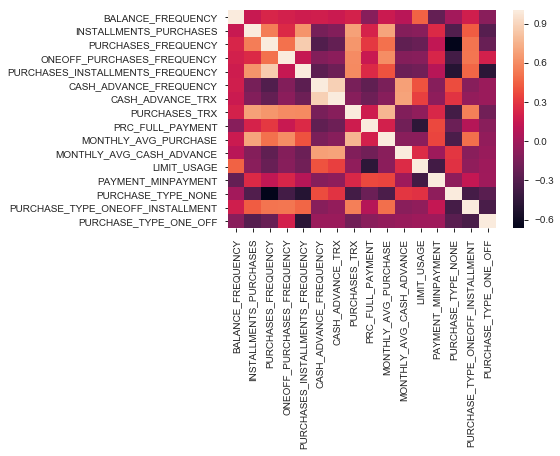

In [44]:
sns.heatmap(modified_data.corr())
plt.show()

# Standardising data

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data = sc.fit_transform(modified_data)

In [50]:
scaled_data_df = pd.DataFrame(scaled_data)
scaled_data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.248514,-0.427513,-0.797242,-0.677221,-0.715675,-0.684016,-0.557505,-0.579714,-0.524666,-0.560473,-0.518323,-0.987280,-0.474269,-0.543690,-0.670193,-0.514625
1,0.135587,-0.568588,-1.220490,-0.677221,-0.916882,0.594617,0.166685,-0.675130,0.227132,-0.621841,2.758750,0.211040,-0.179748,1.839282,-0.670193,-0.514625
2,0.519687,-0.568588,1.269205,2.672431,-0.916882,-0.684016,-0.557505,-0.102638,-0.524666,-0.124484,-0.518323,-0.159868,-0.531193,-0.543690,-0.670193,1.943162
3,-1.016715,-0.568588,-1.021315,-0.409249,-0.916882,-0.274853,-0.376457,-0.627422,-0.524666,0.342459,-0.413646,-0.473714,-0.385170,-0.543690,-0.670193,1.943162
4,0.519687,-0.568588,-1.021315,-0.409249,-0.916882,-0.684016,-0.557505,-0.627422,-0.524666,-0.611575,-0.518323,0.838731,-0.310921,-0.543690,-0.670193,1.943162


In [51]:
scaled_data_df.describe().T
# mean ~ 0
# std ~ 1

,count,mean,std,min,25%,50%,75%,max
0,8950.0,5.292923e-15,1.000056,-3.363995,0.050231,0.519687,0.519687,0.519687
1,8950.0,5.149698e-16,1.000056,-0.568588,-0.568588,-0.436977,0.124423,5.178305
2,8950.0,7.642738e-16,1.000056,-1.220490,-1.021315,0.024357,1.070029,1.269205
3,8950.0,5.102114e-15,1.000056,-0.677221,-0.677221,-0.409249,0.327675,2.672431
4,8950.0,4.331731e-16,1.000056,-0.916882,-0.916882,-0.489318,0.969432,1.598203
5,8950.0,4.118121e-16,1.000056,-0.684016,-0.684016,-0.684016,0.441181,3.561046
6,8950.0,-6.159877e-16,1.000056,-0.557505,-0.557505,-0.557505,0.166685,4.692870
7,8950.0,2.936385e-15,1.000056,-0.675130,-0.627422,-0.341176,0.135901,4.883292
8,8950.0,-1.891039e-15,1.000056,-0.524666,-0.524666,-0.524666,-0.046249,2.892596
9,8950.0,6.744698e-16,1.000056,-0.621841,-0.595615,-0.375324,0.128691,5.234456


# Applying PCA for variable reduction

In [52]:
from sklearn.decomposition import PCA
pc = PCA(n_components=16)
pc.fit(data_scaled_df)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [53]:
pc.explained_variance_

array([5.27028107, 2.77234029, 1.64649577, 1.54146655, 1.0069102 ,
       0.79550973, 0.7499195 , 0.48588759, 0.39443269, 0.36729404,
       0.35115087, 0.18973774, 0.17604822, 0.11381593, 0.10644222,
       0.0340555 ])

In [55]:
sum(pc.explained_variance_) # nearly equal to no of variables(each variable variance ~1)

16.001787909263605

In [56]:
np.round(pc.explained_variance_,decimals=6)

array([5.270281, 2.77234 , 1.646496, 1.541467, 1.00691 , 0.79551 ,
       0.749919, 0.485888, 0.394433, 0.367294, 0.351151, 0.189738,
       0.176048, 0.113816, 0.106442, 0.034056])

In [58]:
np.round(pc.explained_variance_ratio_*100,decimals=4)

array([32.9356, 17.3252, 10.2894,  9.6331,  6.2925,  4.9714,  4.6865,
        3.0365,  2.4649,  2.2953,  2.1944,  1.1857,  1.1002,  0.7113,
        0.6652,  0.2128])

In [57]:
np.cumsum(np.round(pc.explained_variance_ratio_,decimals=4)*100)

array([ 32.94,  50.27,  60.56,  70.19,  76.48,  81.45,  86.14,  89.18,
        91.64,  93.94,  96.13,  97.32,  98.42,  99.13,  99.8 , 100.01])

In [ ]:
# 5 components explain 76.48% of variance and each component have >0.8 variance
# So, we are choosing 5 components

In [59]:
pc_final = PCA(n_components=5).fit(data_scaled_df)

In [60]:
np.cumsum(np.round(pc_final.explained_variance_ratio_,decimals=4)*100)

array([32.94, 50.27, 60.56, 70.19, 76.48])

In [61]:
reduced_data = pc_final.fit_transform(data_scaled_df)

In [63]:
reduced_data.shape

(8950, 5)

In [64]:
modified_data.shape

(8950, 16)

In [65]:
pd.DataFrame(reduced_data).head()

,0,1,2,3,4
0,-0.919858,-1.645278,-0.556875,-0.246255,-0.038542
1,-2.858310,1.018925,0.872804,-1.154371,0.432488
2,0.602439,-0.786057,-0.081508,3.305649,-0.307047
3,-1.236637,-1.682721,0.531155,1.619343,-0.132612
4,-1.511717,-1.197650,-0.724377,2.013724,0.133478


In [69]:
weights_df = pd.DataFrame(pc_final.components_,columns= modified_data.columns).T
weights_df
# weights of 16 vars to combine linearly to give pc's 

,0,1,2,3,4
BALANCE_FREQUENCY,0.054600,0.333170,-0.330916,0.169967,0.055081
INSTALLMENTS_PURCHASES,0.317760,0.166781,0.013742,-0.174580,0.152219
PURCHASES_FREQUENCY,0.375685,0.068677,-0.129902,-0.013296,-0.340822
ONEOFF_PURCHASES_FREQUENCY,0.257555,0.124461,0.195874,0.446255,0.124720
PURCHASES_INSTALLMENTS_FREQUENCY,0.335786,0.086972,-0.222391,-0.297365,-0.299282
CASH_ADVANCE_FREQUENCY,-0.210900,0.440283,0.209657,-0.041457,-0.191772
CASH_ADVANCE_TRX,-0.178667,0.440741,0.247599,-0.048494,-0.279346
PURCHASES_TRX,0.350252,0.207941,0.052347,0.065341,0.169979
PRC_FULL_PAYMENT,0.178239,-0.172318,0.304626,-0.221907,-0.170642
MONTHLY_AVG_PURCHASE,0.324307,0.179661,0.193936,0.140687,0.305454


# Loading Matrix
- Loadings=Eigenvectors * sqrt(Eigenvalues)

- loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [70]:
loadings = weights_df*np.sqrt(pc_final.explained_variance_)
loadings.to_csv("Loadings.csv")
loadings

,0,1,2,3,4
BALANCE_FREQUENCY,0.125346,0.554739,-0.424617,0.211024,0.055271
INSTALLMENTS_PURCHASES,0.729485,0.277696,0.017634,-0.216752,0.152744
PURCHASES_FREQUENCY,0.862465,0.114349,-0.166685,-0.016508,-0.341997
ONEOFF_PURCHASES_FREQUENCY,0.591270,0.207232,0.251338,0.554051,0.125150
PURCHASES_INSTALLMENTS_FREQUENCY,0.770868,0.144812,-0.285363,-0.369196,-0.300314
CASH_ADVANCE_FREQUENCY,-0.484164,0.733087,0.269023,-0.051472,-0.192434
CASH_ADVANCE_TRX,-0.410167,0.733850,0.317709,-0.060208,-0.280310
PURCHASES_TRX,0.804077,0.346229,0.067169,0.081124,0.170565
PRC_FULL_PAYMENT,0.409185,-0.286915,0.390884,-0.275510,-0.171231
MONTHLY_AVG_PURCHASE,0.744514,0.299142,0.248851,0.174672,0.306508


In [73]:
final_vars = ['PURCHASES_FREQUENCY','CASH_ADVANCE_TRX','PAYMENT_MINPAYMENT','PURCHASE_TYPE_ONE_OFF','PURCHASE_TYPE_NONE']

In [75]:
scaled_df = pd.DataFrame(scaled_data,columns=modified_data.columns)
scaled_df.head()

,BALANCE_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,MONTHLY_AVG_PURCHASE,MONTHLY_AVG_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_MINPAYMENT,PURCHASE_TYPE_NONE,PURCHASE_TYPE_ONEOFF_INSTALLMENT,PURCHASE_TYPE_ONE_OFF
0,-0.248514,-0.427513,-0.797242,-0.677221,-0.715675,-0.684016,-0.557505,-0.579714,-0.524666,-0.560473,-0.518323,-0.987280,-0.474269,-0.543690,-0.670193,-0.514625
1,0.135587,-0.568588,-1.220490,-0.677221,-0.916882,0.594617,0.166685,-0.675130,0.227132,-0.621841,2.758750,0.211040,-0.179748,1.839282,-0.670193,-0.514625
2,0.519687,-0.568588,1.269205,2.672431,-0.916882,-0.684016,-0.557505,-0.102638,-0.524666,-0.124484,-0.518323,-0.159868,-0.531193,-0.543690,-0.670193,1.943162
3,-1.016715,-0.568588,-1.021315,-0.409249,-0.916882,-0.274853,-0.376457,-0.627422,-0.524666,0.342459,-0.413646,-0.473714,-0.385170,-0.543690,-0.670193,1.943162
4,0.519687,-0.568588,-1.021315,-0.409249,-0.916882,-0.684016,-0.557505,-0.627422,-0.524666,-0.611575,-0.518323,0.838731,-0.310921,-0.543690,-0.670193,1.943162


In [77]:
reduced_df = scaled_df.loc[:,final_vars]
reduced_df.head()

,PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PAYMENT_MINPAYMENT,PURCHASE_TYPE_ONE_OFF,PURCHASE_TYPE_NONE
0,-0.797242,-0.557505,-0.474269,-0.514625,-0.543690
1,-1.220490,0.166685,-0.179748,-0.514625,1.839282
2,1.269205,-0.557505,-0.531193,1.943162,-0.543690
3,-1.021315,-0.376457,-0.385170,1.943162,-0.543690
4,-1.021315,-0.557505,-0.310921,1.943162,-0.543690


# Segmentation

In [81]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,random_state=10)

In [82]:
km.fit(reduced_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [83]:
km.cluster_centers_

array([[-0.42338934, -0.04402173, -0.01287358,  1.94316249, -0.54369045],
       [-1.21584273,  0.55139968, -0.12471493, -0.514625  ,  1.82190485],
       [ 0.65638974, -0.20955019,  0.05592024, -0.514625  , -0.54369045]])

In [84]:
km.labels_

array([2, 1, 0, ..., 2, 1, 0])

In [85]:
pd.Series(km.labels_).value_counts()/len(km.labels_)*100
# distribution of clusters

2    56.078212
1    22.983240
0    20.938547
dtype: float64

In [86]:
# appropiate no of clusters is decided by 3 params ----
# 1.Silhouette Coefficient(nearer to 1 is better)
# 2.distribution of clusters(between 4-40%)
# 3.Profiling(similarity within clusters and difference between clusters)

In [88]:
k_range = range(3,9) 
sc_score = []
for k in k_range:
    km_ = KMeans(n_clusters=k,random_state=10)
    km_.fit(reduced_df)
    sc_score.append(metrics.silhouette_score(reduced_df,km_.labels_))
    print(metrics.silhouette_score(reduced_df,km_.labels_), 'is sc_score for',k,'clusters')
    print('the distribution of clusters is----')
    print(pd.Series(km_.labels_).value_counts()/len(km_.labels_)*100)
    print('---------------------------------------------------')

0.5192699402393265 is sc_score for 3 clusters
the distribution of clusters is----
2    56.078212
1    22.983240
0    20.938547
dtype: float64
---------------------------------------------------
0.5437031619801999 is sc_score for 4 clusters
the distribution of clusters is----
1    52.826816
2    22.145251
3    19.988827
0     5.039106
dtype: float64
---------------------------------------------------
0.5669975091156754 is sc_score for 5 clusters
the distribution of clusters is----
0    50.391061
1    20.357542
4    19.061453
3     5.340782
2     4.849162
dtype: float64
---------------------------------------------------
0.468543239559833 is sc_score for 6 clusters
the distribution of clusters is----
0    32.547486
2    20.368715
1    19.061453
4    18.324022
5     5.284916
3     4.413408
dtype: float64
---------------------------------------------------
0.47171185156041623 is sc_score for 7 clusters
the distribution of clusters is----
1    32.089385
2    18.938547
0    18.279330
5    18

In [89]:
sc_score

[0.5192699402393265,
 0.5437031619801999,
 0.5669975091156754,
 0.468543239559833,
 0.47171185156041623,
 0.48499217493737656]

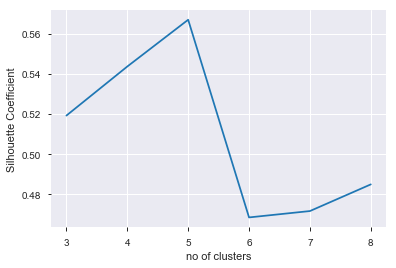

In [90]:
plt.plot(k_range,sc_score)
plt.xlabel('no of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [ ]:
#PROFILING

In [91]:
km_3 = KMeans(n_clusters=3).fit(reduced_df)
km_4 = KMeans(n_clusters=4).fit(reduced_df)
km_5 = KMeans(n_clusters=5).fit(reduced_df)
km_6 = KMeans(n_clusters=6).fit(reduced_df)
km_7 = KMeans(n_clusters=7).fit(reduced_df)
km_8 = KMeans(n_clusters=8).fit(reduced_df)

In [92]:
modified_data['cluster_3'] = km_3.labels_
modified_data['cluster_4'] = km_4.labels_
modified_data['cluster_5'] = km_5.labels_
modified_data['cluster_6'] = km_6.labels_
modified_data['cluster_7'] = km_7.labels_
modified_data['cluster_8'] = km_8.labels_

In [93]:
modified_data.head()

,BALANCE_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,MONTHLY_AVG_PURCHASE,...,PAYMENT_MINPAYMENT,PURCHASE_TYPE_NONE,PURCHASE_TYPE_ONEOFF_INSTALLMENT,PURCHASE_TYPE_ONE_OFF,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,0.82,95.4,0.17,0.00,0.08,0.00,0,2.0,0.00,7.95,...,1.45,0,0,0,0,0,0,4,0,5
1,0.91,0.0,0.00,0.00,0.00,0.25,4,0.0,0.22,0.00,...,3.83,1,0,0,1,1,3,2,5,1
2,1.00,0.0,1.00,1.00,0.00,0.00,0,12.0,0.00,64.43,...,0.99,0,0,1,2,2,4,3,2,2
3,0.64,0.0,0.08,0.08,0.00,0.08,1,1.0,0.00,124.92,...,2.17,0,0,1,2,2,4,3,2,2
4,1.00,0.0,0.08,0.08,0.00,0.00,0,1.0,0.00,1.33,...,2.77,0,0,1,2,2,4,3,2,2


In [94]:
cluster_size = pd.concat([pd.Series(modified_data.cluster_3.count()),pd.Series.sort_index(modified_data.cluster_3.value_counts()),
         pd.Series.sort_index(modified_data.cluster_4.value_counts()),pd.Series.sort_index(modified_data.cluster_5.value_counts()),
         pd.Series.sort_index(modified_data.cluster_6.value_counts()),pd.Series.sort_index(modified_data.cluster_7.value_counts()),
         pd.Series.sort_index(modified_data.cluster_8.value_counts())],axis=0)

In [96]:
cluster_size_ratio = cluster_size/modified_data.cluster_3.count()

In [97]:
cluster_size_df = pd.DataFrame(cluster_size,columns=['size']).T
cluster_size_ratio_df = pd.DataFrame(cluster_size_ratio,columns=['size_ratio']).T

In [98]:
cluster_size_df

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
size,8950,5019,2057,1874,4727,1983,1789,451,4511,434,...,1577,388,2368,1684,1700,669,384,1607,247,291


In [99]:
cluster_size_ratio_df

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
size_ratio,1.0,0.560782,0.229832,0.209385,0.528156,0.221564,0.199888,0.050391,0.504022,0.048492,...,0.176201,0.043352,0.264581,0.188156,0.189944,0.074749,0.042905,0.179553,0.027598,0.032514


In [109]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
profiling_output = pd.concat([pd.DataFrame(modified_data.apply(lambda x: x.mean())),modified_data.groupby(['cluster_3']).mean().T,modified_data.groupby(['cluster_4']).mean().T,
         modified_data.groupby(['cluster_5']).mean().T,modified_data.groupby(['cluster_6']).mean().T,
          modified_data.groupby(['cluster_7']).mean().T,modified_data.groupby(['cluster_8']).mean().T],axis=1)
profiling_output = profiling_output.drop(['cluster_3','cluster_4','cluster_5','cluster_6','cluster_7','cluster_8'])
profiling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
BALANCE_FREQUENCY,0.878230,0.891552,0.883486,0.836782,0.896571,0.901114,0.846523,0.711153,0.892578,0.705668,...,0.886493,0.973428,0.959269,0.890350,0.837794,0.888206,0.973802,0.789726,0.611822,0.950687
CASH_ADVANCE_FREQUENCY,0.133740,0.080606,0.272338,0.123911,0.082361,0.276046,0.125757,0.078204,0.057677,0.066751,...,0.206937,0.574742,0.056470,0.222684,0.097976,0.038311,0.578125,0.055339,0.083036,0.565704
CASH_ADVANCE_TRX,3.079330,1.921897,6.124939,2.836179,1.961286,6.193142,2.891560,1.851441,1.103968,1.370968,...,3.499049,19.123711,1.028294,3.928741,1.867647,0.701046,19.223958,1.052894,1.817814,18.357388
INSTALLMENTS_PURCHASES,384.498368,685.024450,1.518075,0.000000,632.140082,1.574725,0.000000,997.808308,631.409567,994.301468,...,0.000000,507.022764,774.014552,0.000000,0.000000,1166.095738,507.443105,272.548688,791.222642,0.000000
LIMIT_USAGE,0.386032,0.314100,0.566325,0.380784,0.328344,0.585315,0.395601,0.076497,0.313033,0.072442,...,0.574984,0.616649,0.353095,0.581015,0.381776,0.102930,0.615651,0.308482,0.066761,0.597663
MONTHLY_AVG_CASH_ADVANCE,84.921108,49.963138,177.991225,76.387927,50.531318,176.417714,76.340453,77.101945,33.983532,68.740300,...,132.746781,387.420736,32.135590,140.936451,57.690467,27.198336,388.570978,31.309621,96.072269,367.988689
MONTHLY_AVG_PURCHASE,80.556217,118.411036,0.258979,67.310796,105.073977,0.268643,60.112374,257.693335,104.177791,256.587286,...,0.000000,116.425927,122.795777,0.000000,60.676744,229.907436,115.937035,44.265715,233.135128,0.000000
ONEOFF_PURCHASES_FREQUENCY,0.202177,0.240785,0.000695,0.319931,0.224007,0.000721,0.314114,0.415122,0.220452,0.411959,...,0.000000,0.301057,0.256153,0.000000,0.314459,0.483991,0.297682,0.092365,0.331174,0.000000
PAYMENT_MINPAYMENT,5.282535,5.734423,4.274722,5.178505,4.151235,2.910978,3.736143,33.701488,4.210971,34.033896,...,2.847736,3.920309,3.176085,2.809311,3.831129,16.339671,3.936719,2.884406,41.512757,4.062165
PRC_FULL_PAYMENT,0.153534,0.217583,0.043933,0.102300,0.199175,0.029894,0.086266,0.485632,0.208029,0.485783,...,0.029030,0.042036,0.201199,0.028385,0.088800,0.444933,0.041406,0.162582,0.444049,0.049553


In [110]:
final_profiling = pd.concat([cluster_size_df,cluster_size_ratio_df,profiling_output],axis=0)

In [111]:
final_profiling.columns = ['Overall','cl3_1','cl3_2','cl3_3','cl4_1','cl4_2','cl4_3','cl4_4','cl5_1','cl5_2','cl5_3','cl5_4',
                          'cl5_5','cl6_1','cl6_2','cl6_3','cl6_4','cl6_5','cl6_6','cl7_1','cl7_2','cl7_3','cl7_4','cl7_5',
                          'cl7_6','cl7_7','cl8_1','cl8_2','cl8_3','cl8_4','cl8_5','cl8_6','cl8_7','cl8_8']

In [114]:
final_profiling = final_profiling.round(3)
final_profiling

,Overall,cl3_1,cl3_2,cl3_3,cl4_1,cl4_2,cl4_3,cl4_4,cl5_1,cl5_2,...,cl7_6,cl7_7,cl8_1,cl8_2,cl8_3,cl8_4,cl8_5,cl8_6,cl8_7,cl8_8
size,8950.000,5019.000,2057.000,1874.000,4727.000,1983.000,1789.000,451.000,4511.000,434.000,...,1577.000,388.000,2368.000,1684.000,1700.000,669.000,384.000,1607.000,247.000,291.000
size_ratio,1.000,0.561,0.230,0.209,0.528,0.222,0.200,0.050,0.504,0.048,...,0.176,0.043,0.265,0.188,0.190,0.075,0.043,0.180,0.028,0.033
BALANCE_FREQUENCY,0.878,0.892,0.883,0.837,0.897,0.901,0.847,0.711,0.893,0.706,...,0.886,0.973,0.959,0.890,0.838,0.888,0.974,0.790,0.612,0.951
CASH_ADVANCE_FREQUENCY,0.134,0.081,0.272,0.124,0.082,0.276,0.126,0.078,0.058,0.067,...,0.207,0.575,0.056,0.223,0.098,0.038,0.578,0.055,0.083,0.566
CASH_ADVANCE_TRX,3.079,1.922,6.125,2.836,1.961,6.193,2.892,1.851,1.104,1.371,...,3.499,19.124,1.028,3.929,1.868,0.701,19.224,1.053,1.818,18.357
INSTALLMENTS_PURCHASES,384.498,685.024,1.518,0.000,632.140,1.575,0.000,997.808,631.410,994.301,...,0.000,507.023,774.015,0.000,0.000,1166.096,507.443,272.549,791.223,0.000
LIMIT_USAGE,0.386,0.314,0.566,0.381,0.328,0.585,0.396,0.076,0.313,0.072,...,0.575,0.617,0.353,0.581,0.382,0.103,0.616,0.308,0.067,0.598
MONTHLY_AVG_CASH_ADVANCE,84.921,49.963,177.991,76.388,50.531,176.418,76.340,77.102,33.984,68.740,...,132.747,387.421,32.136,140.936,57.690,27.198,388.571,31.310,96.072,367.989
MONTHLY_AVG_PURCHASE,80.556,118.411,0.259,67.311,105.074,0.269,60.112,257.693,104.178,256.587,...,0.000,116.426,122.796,0.000,60.677,229.907,115.937,44.266,233.135,0.000
ONEOFF_PURCHASES_FREQUENCY,0.202,0.241,0.001,0.320,0.224,0.001,0.314,0.415,0.220,0.412,...,0.000,0.301,0.256,0.000,0.314,0.484,0.298,0.092,0.331,0.000


In [115]:
final_profiling.to_csv('Final_profiling.csv')

# Selecting best  numbers of clusters
- On the basis of Silhouette Coefficient,distribution of clusters & Profiling, 4 clusters is best solution.
- Characteristics of each cluster given below:-

**Cluster-1** - It is 52 % of total customer base, second highest monthly purchase, Low Monthly cash advance, Installment Purchase second highest and prefer only ONEOFF_INSTALLMENT type purchase

**Cluster-2** - It is 22 % of total customer base, Lowest Monthly purchase, Highest Monthly cash advance , Less Installment purchase and has majorly NONE type purchase

**Cluster-3** - It is 20 % of total customer base, Low Monthly purchase, Medium Monthly cash advance , Lowest Installment purchase and has majorly ONE_OFF type purchase 

**Cluster-4** - It is 5 % of total customer base, Highest Monthly purchase, Highest Monthly cash advance , Less Installment purchase and has majorly INSTALLMENT type purchase